In [2]:
import os
import glob
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

cameras = [
    ["CAM02009CCTV7.jpg", 
     "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)","no change",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", 
     "Port Matilda US-322 By-Pass Westbound","changed 4/27",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", 
     "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220","no change",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", 
     "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150","changed 4/27",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg",
     "I-99 at Exit 71 (Toftrees)","changed 5/5",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg",
     "Snowshoe I-80 Exit 147","no change",41.022703,-77.933981],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219],
        ["ytbeaver",
     "beaver.","no change",40.804483,-77.864219],
            ["ytcollege",
     "college","no change",40.804483,-77.864219],
    ]

camera_subset = [

    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camera_subsetx = [
    

  
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219],
    
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817]
]

camdfs = pd.DataFrame(cameras,columns = ['ID','Description','status','Latitude','Longitude'])
camdfs[['ID','Description','status']]

ID                                        Description  \
0    CAM02009CCTV7.jpg  I-80 Eastbound Exit 161 Bellefonte Interchange...   
1    CAM02001CCTV2.jpg              Port Matilda US-322 By-Pass Westbound   
2   CAM02010CCTV11.jpg                   Port Matilda I-99 Exit 61 Median   
3    CAM02005CCTV9.jpg  Milesburg Interchange West I-80 Exit 158 Eastb...   
4   CAM02006CCTV10.jpg  Milesburg Interchange East I-80 Exit 158 Westb...   
5   CAM02028CCTV32.jpg                          Atherton and Valley Vista   
6   CAM02037CCTV43.jpg                                 Atherton and Vairo   
7   CAM02038CCTV44.jpg                           Atherton and North Hills   
8   CAM02039CCTV45.jpg                                  Atherton and Park   
9   CAM02040CCTV46.jpg                             Atherton and W.College   
10  CAM02042CCTV49.jpg                              Atherton and W.Beaver   
11   CAM02003CCTV4.jpg                            I-99/US-322 Interchange   
12  CAM02020CCTV24.jpg                                        Benner Pike   
13   CAM02002CCTV3.jpg                                        Grays Woods   
14  CAM02007CCTV13.jpg                                   US-322 E/O PA-26   
15  CAM02046CCTV52.jpg                         I-99 at Exit 71 (Toftrees)   
16  CAM02033CCTV38.jpg                             Snowshoe I-80 Exit 147   
17      collegeTwp.jpg                    College Township Traffic camera   
18   parkArboretum.jpg                                      PSU Park Ave.   
19            ytbeaver                                            beaver.   
20           ytcollege                                            college   

                            status  
0                        no change  
1                     changed 4/27  
2                        no change  
3                        no change  
4                     changed 4/27  
5                        no change  
6                        no change  
7                        no change  
8                        no change  
9                      changed 5/2  
10  changed 5/2-5/4, then returned  
11                     changed 5/1  
12  changed 5/6-5/7, then returned  
13                     changed 5/3  
14                     changed 5/4  
15                     changed 5/5  
16                       no change  
17                       no change  
18                       no change  
19                       no change  
20                       no change

In [3]:
date = "121221"

In [4]:
# Loading all camera data...

#xdf = pd.read_csv("/home/ubuntu/nitelite/full_vehicles_427-615-partial-all-cameras.csv")
xdf = pd.read_csv("allcams121221.csv")
xdf['datetime_EST'] = pd.to_datetime(xdf['datetime_EST'])
xdf.sort_values(by='datetime_EST')



datetime_UTC  \
0         2020-04-27 00:00:02   
1         2020-04-27 00:00:05   
2         2020-04-27 00:00:08   
3         2020-04-27 00:00:10   
4         2020-04-27 00:00:12   
...                       ...   
23348765  2021-12-12 14:39:44   
23348766  2021-12-12 14:39:46   
23348767  2021-12-12 14:39:48   
23348768  2021-12-12 14:39:51   
23348769  2021-12-12 14:39:53   

                                                 image_file  vehicle_count  \
0         /home/ubuntu/cams1/20200427_000002_CAM02033CCT...              0   
1         /home/ubuntu/cams1/20200427_000005_collegeTwp.jpg              2   
2         /home/ubuntu/cams1/20200427_000008_CAM02028CCT...              1   
3         /home/ubuntu/cams1/20200427_000010_CAM02037CCT...              3   
4         /home/ubuntu/cams1/20200427_000012_CAM02038CCT...              0   
...                                                     ...            ...   
23348765  /home/ubuntu/camse19/CAM02010CCTV11/20211212/2...              0   
23348766  /home/ubuntu/camse19/CAM02005CCTV9/20211212/20...              1   
23348767  /home/ubuntu/camse19/CAM02006CCTV10/20211212/2...              0   
23348768  /home/ubuntu/camse19/CAM02033CCTV38/20211212/2...              0   
23348769  /home/ubuntu/camse19/CAM02028CCTV32/20211212/2...              0   

                datetime_EST     camera_name  
0        2020-04-26 20:00:02  CAM02033CCTV38  
1        2020-04-26 20:00:05      collegeTwp  
2        2020-04-26 20:00:08  CAM02028CCTV32  
3        2020-04-26 20:00:10  CAM02037CCTV43  
4        2020-04-26 20:00:12  CAM02038CCTV44  
...                      ...             ...  
23348765 2021-12-12 10:39:44  CAM02010CCTV11  
23348766 2021-12-12 10:39:46   CAM02005CCTV9  
23348767 2021-12-12 10:39:48  CAM02006CCTV10  
23348768 2021-12-12 10:39:51  CAM02033CCTV38  
23348769 2021-12-12 10:39:53  CAM02028CCTV32  

[23348770 rows x 5 columns]

In [5]:
print(len(xdf))

23348770


In [4]:
icdf = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]

In [11]:
def get_vcc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/60.0))
    return(rv)

def get_vcc_avg_daily(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 60.0)))
    return(rv)

def get_vcc_avg_weekly(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 7.0 * 60.0)))
    return(rv)  

In [6]:
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [7]:
icdfcvc.to_csv(f"vehicle_avg_per_hour_each_camera_427-{date}.csv",index=False)

/home/ubuntu/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


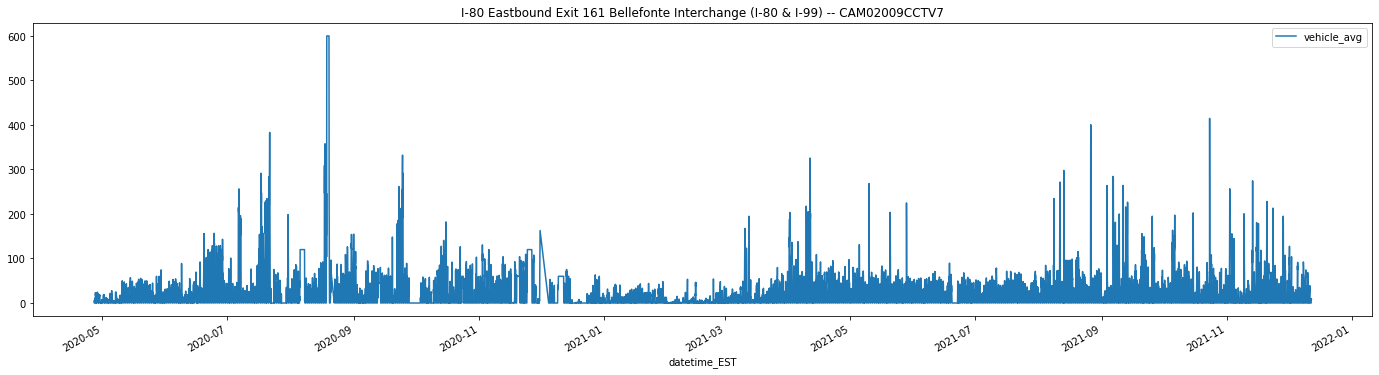

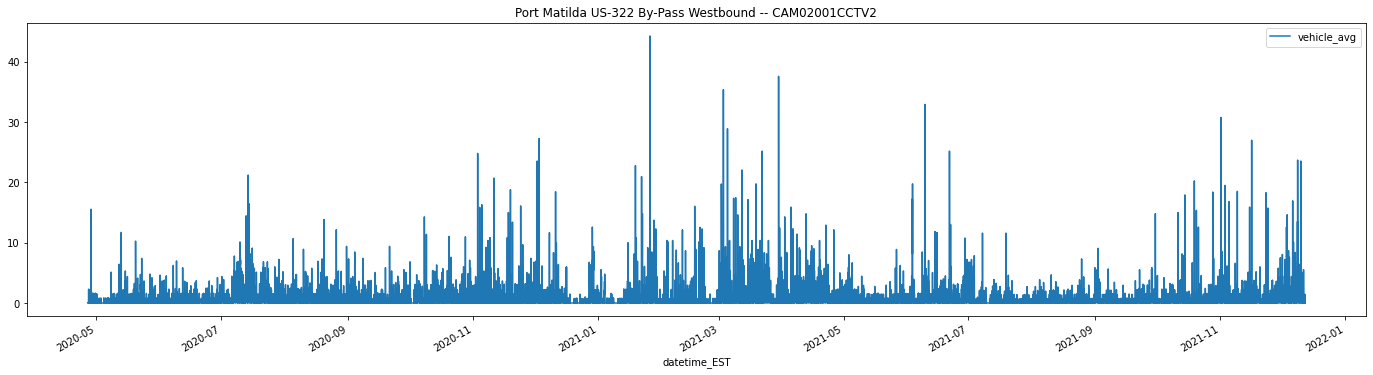

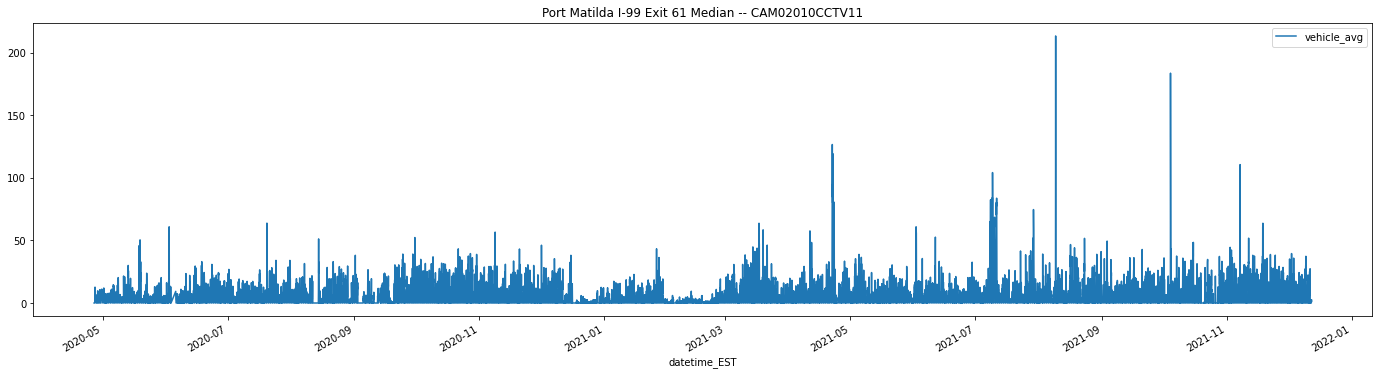

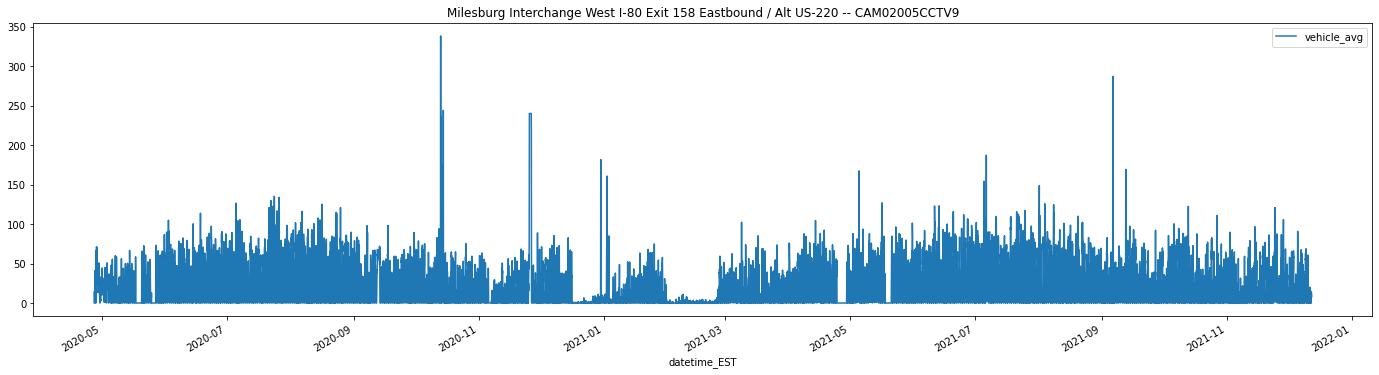

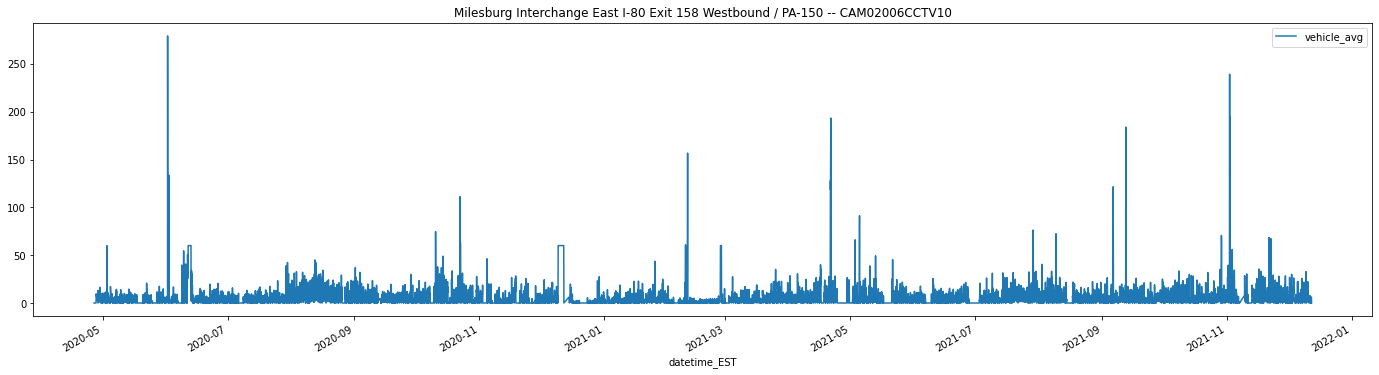

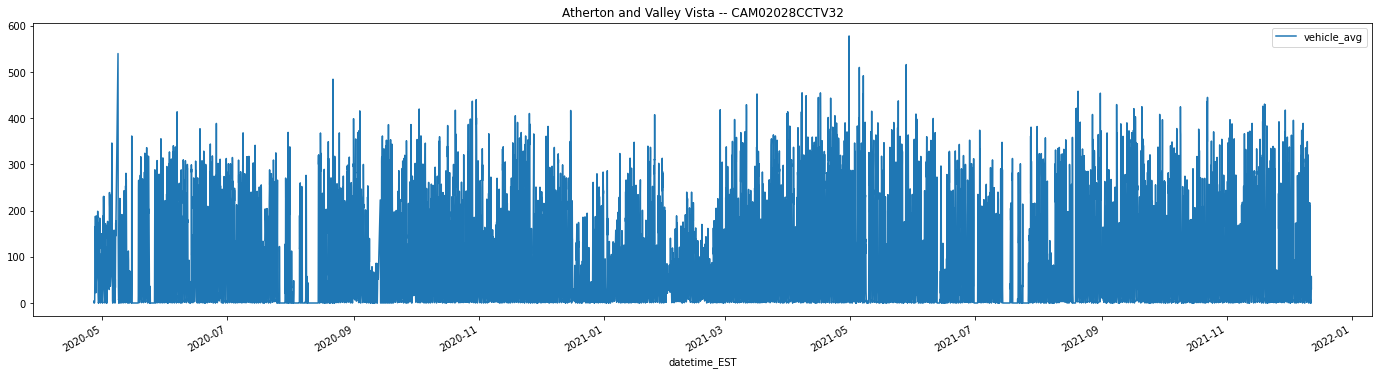

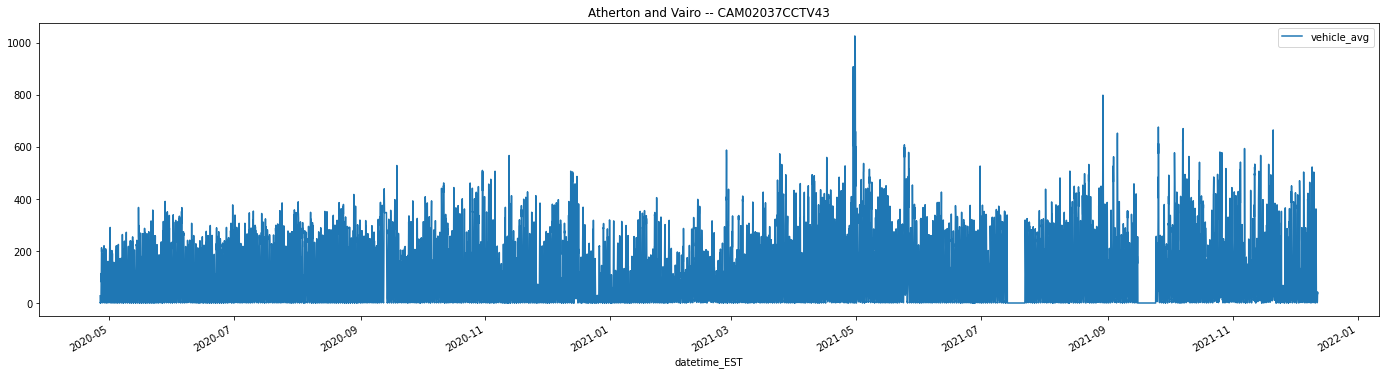

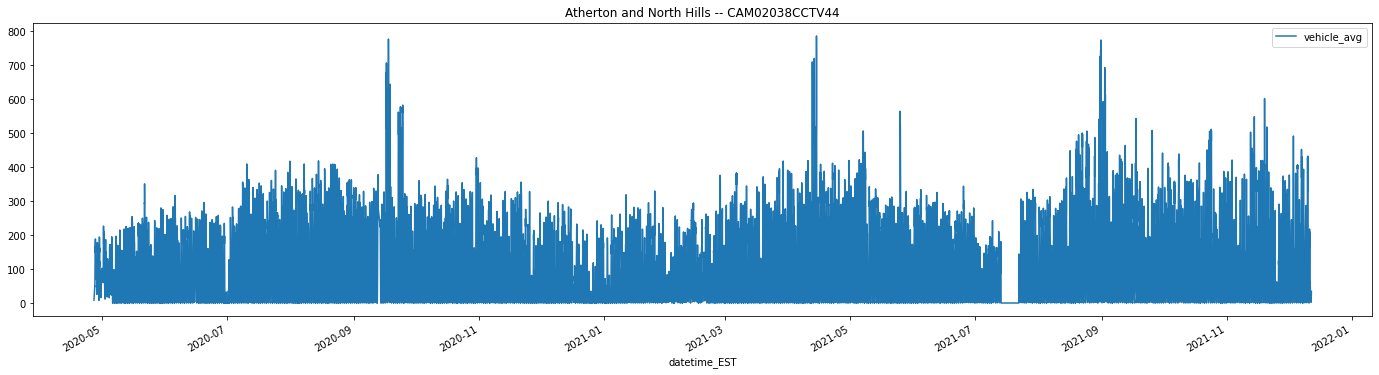

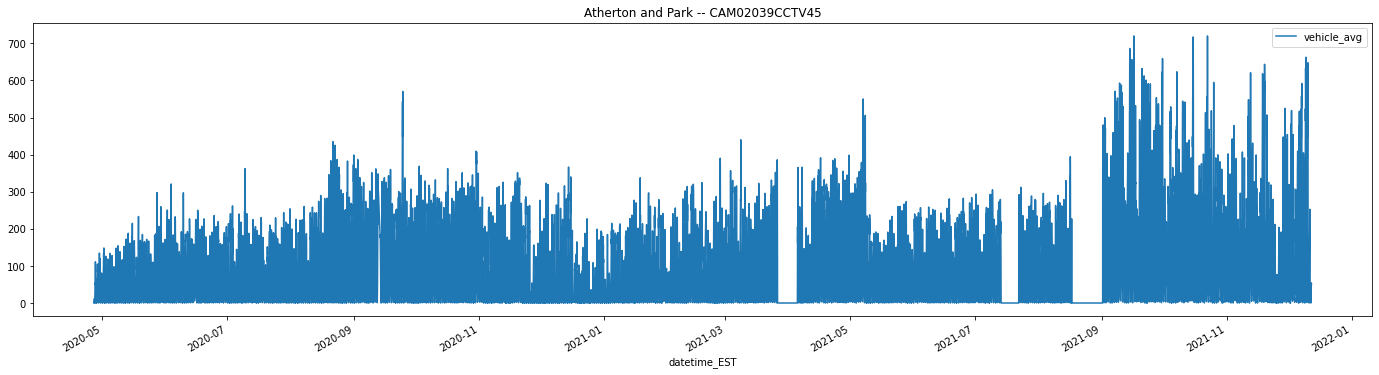

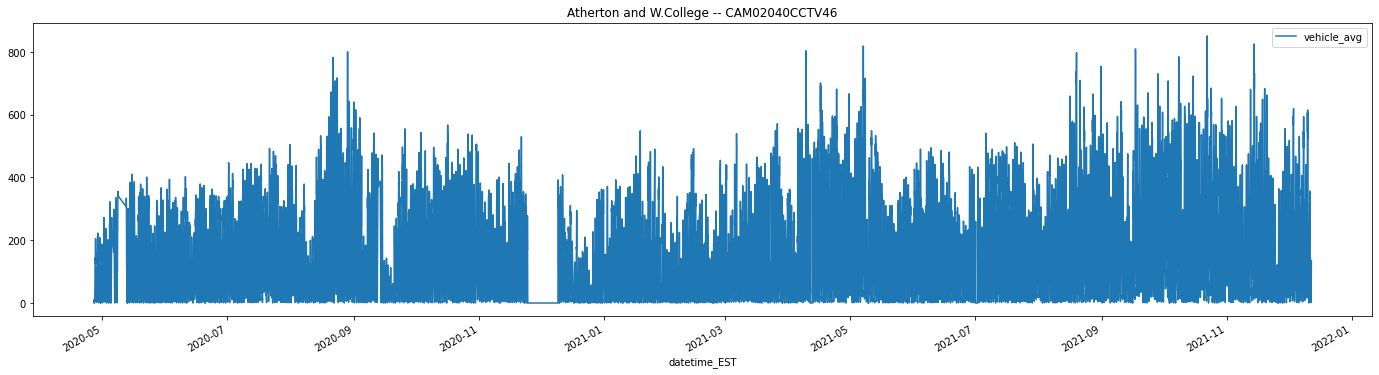

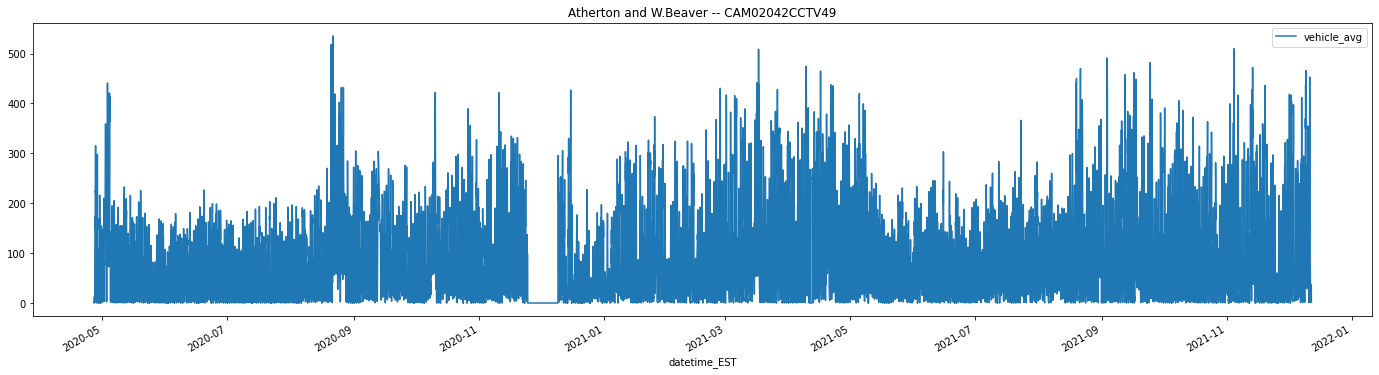

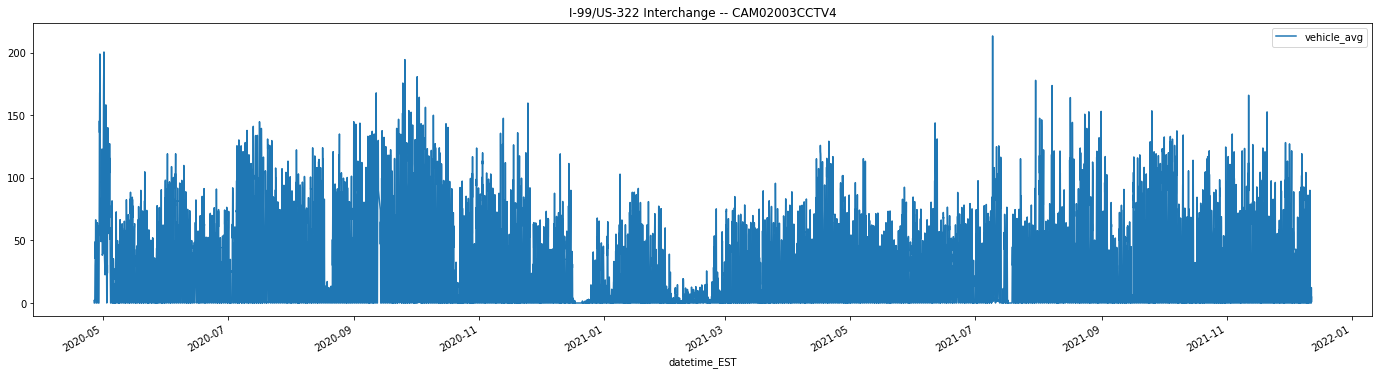

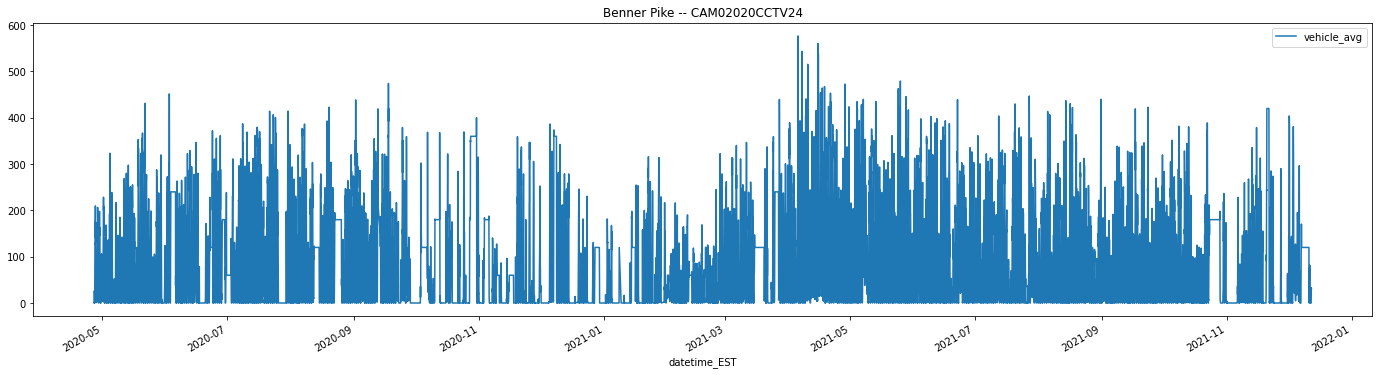

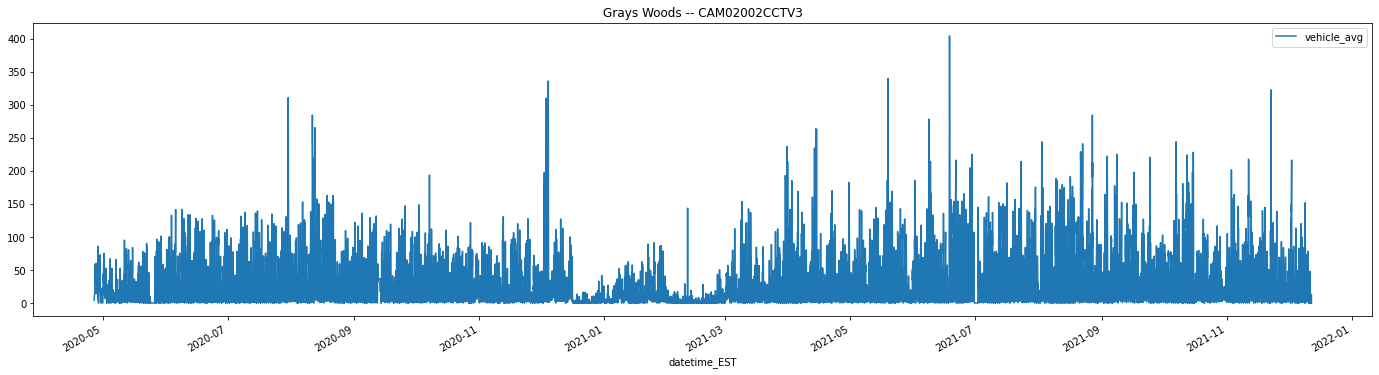

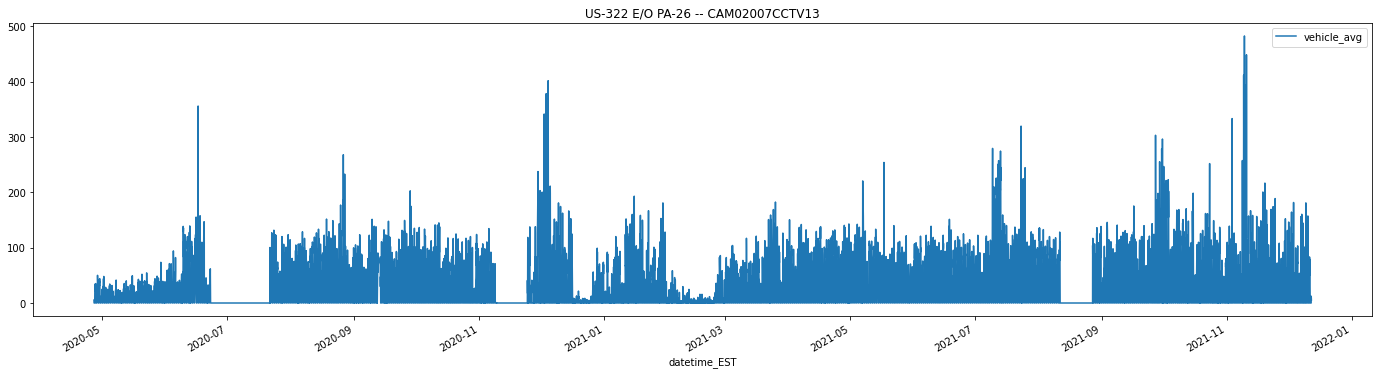

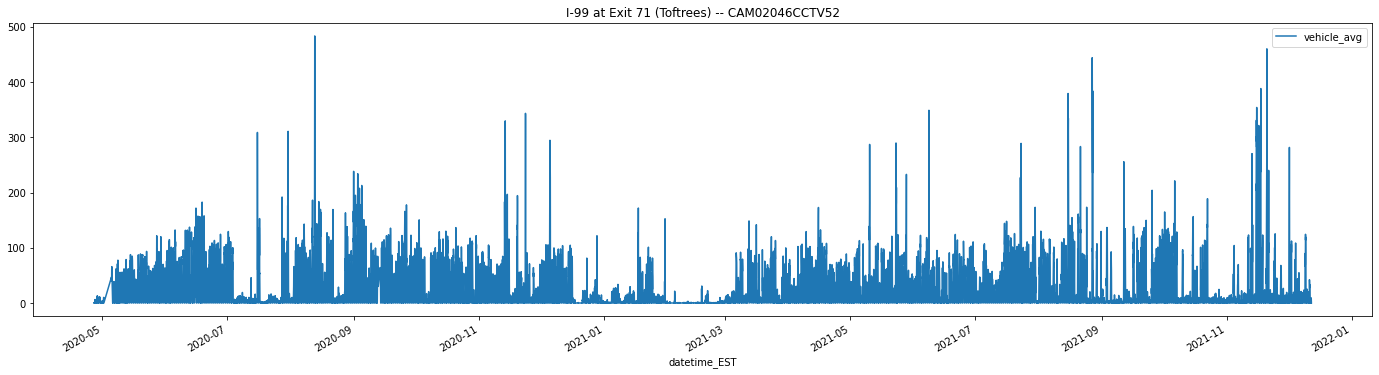

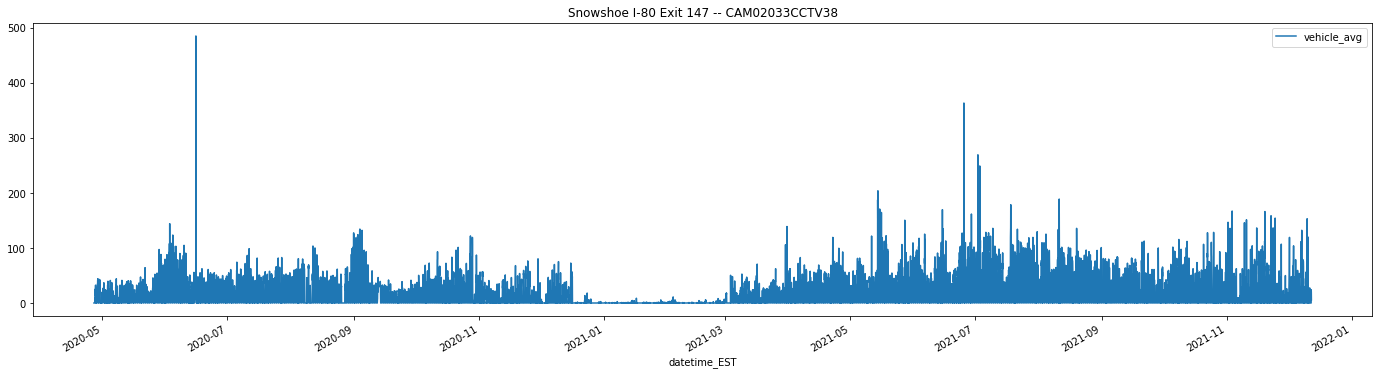

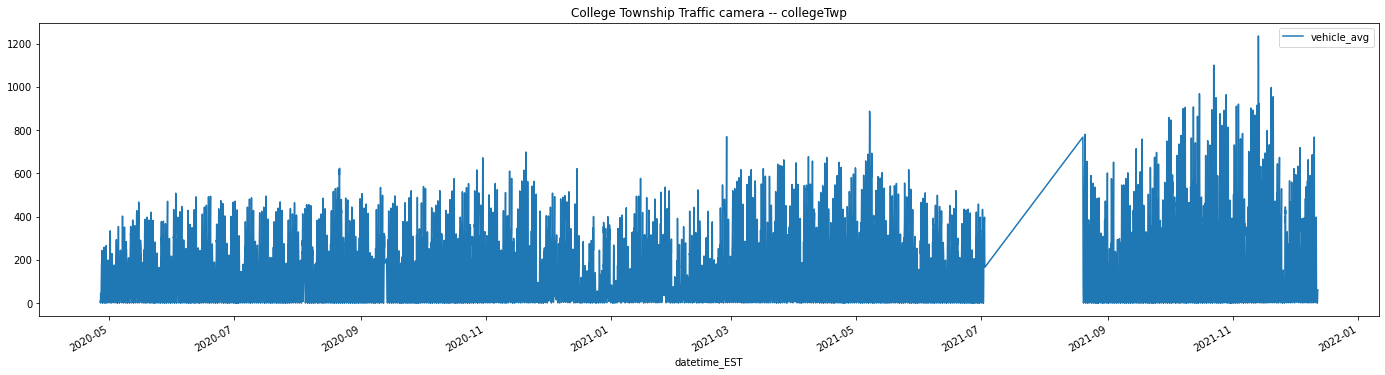

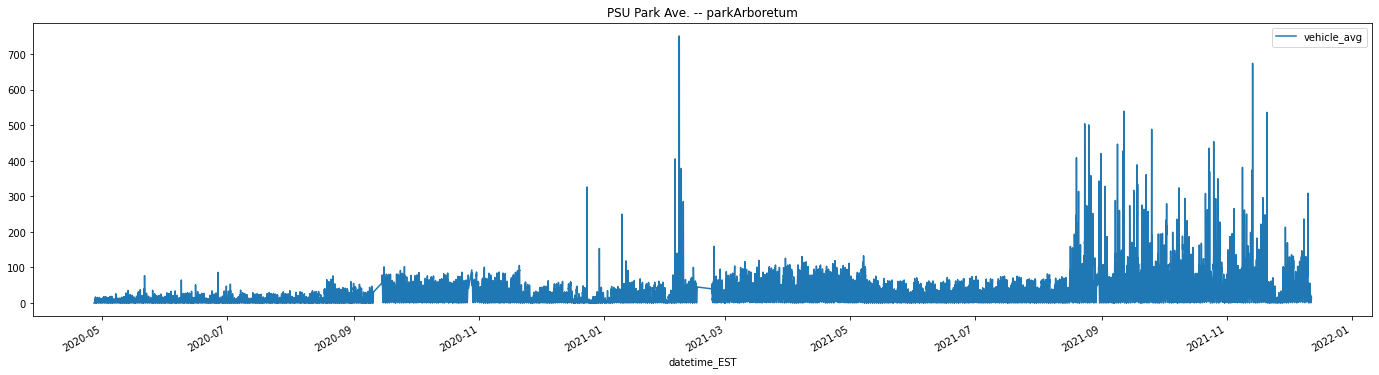

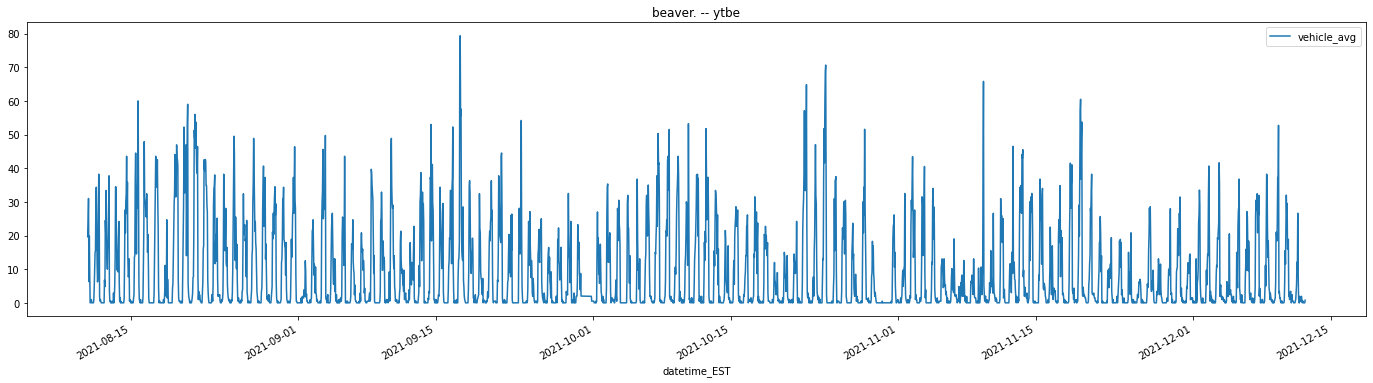

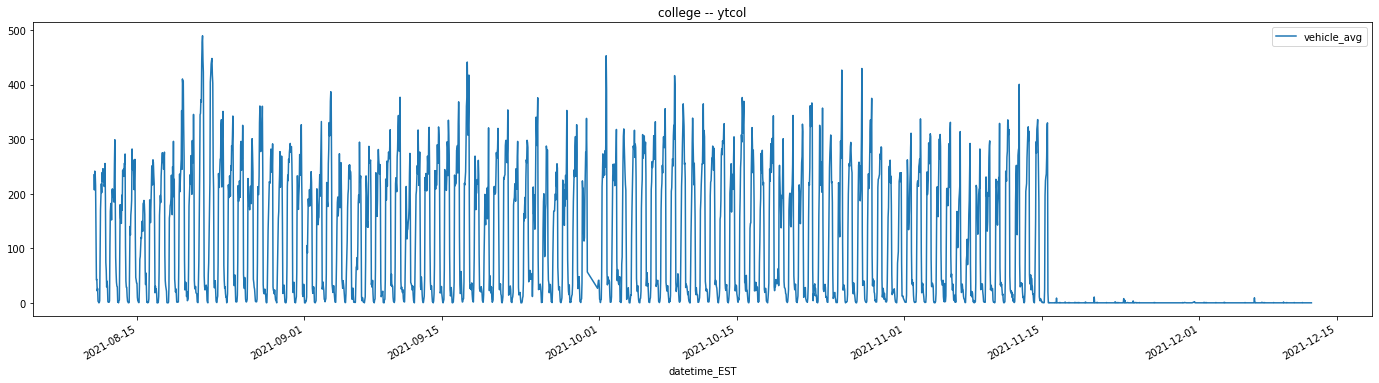

In [8]:

for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    ax = fdf_twp.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

/home/ubuntu/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


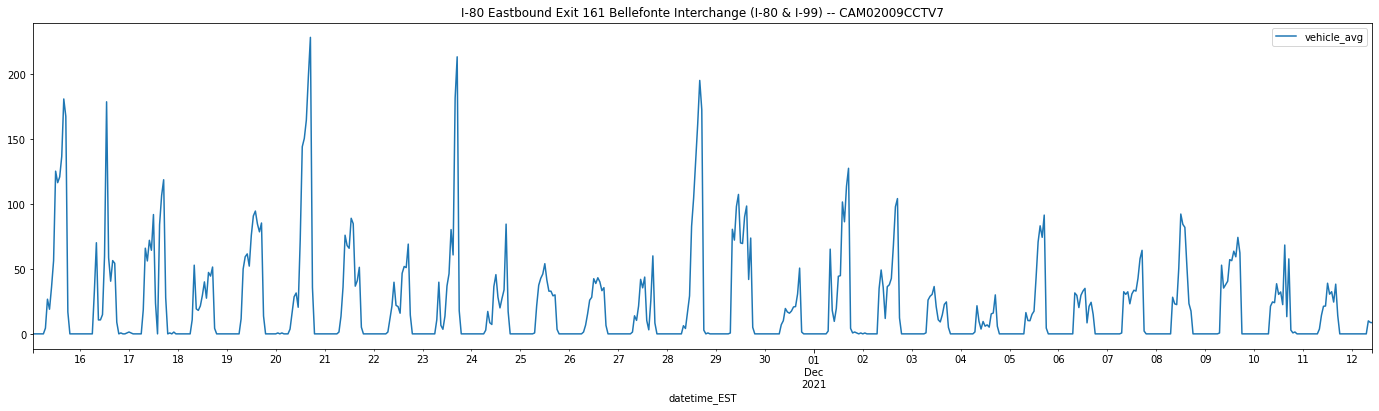

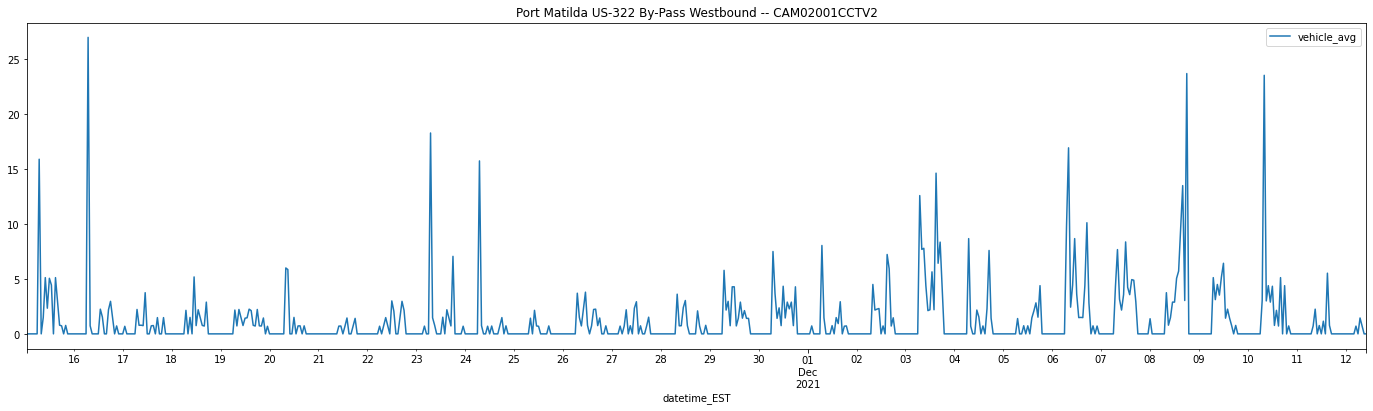

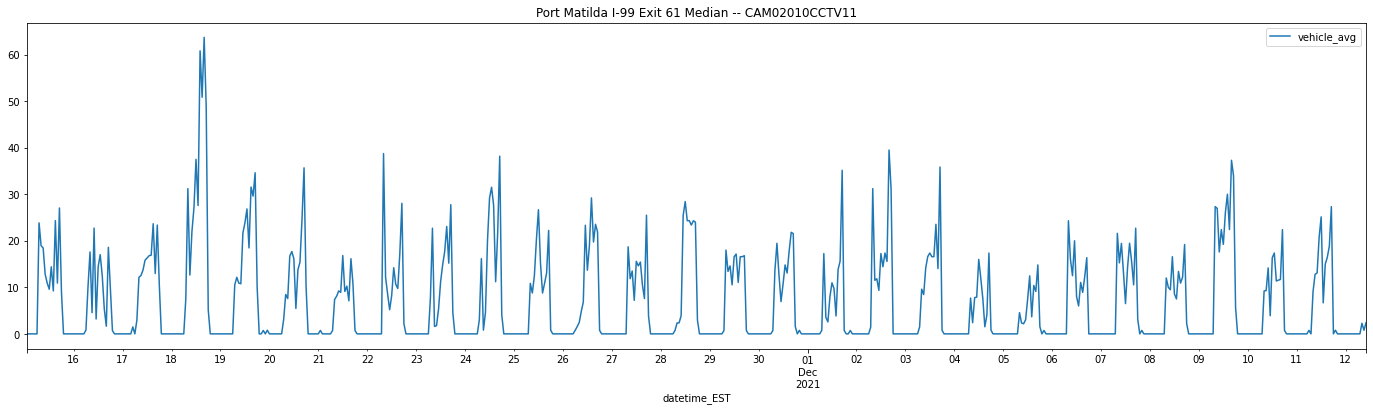

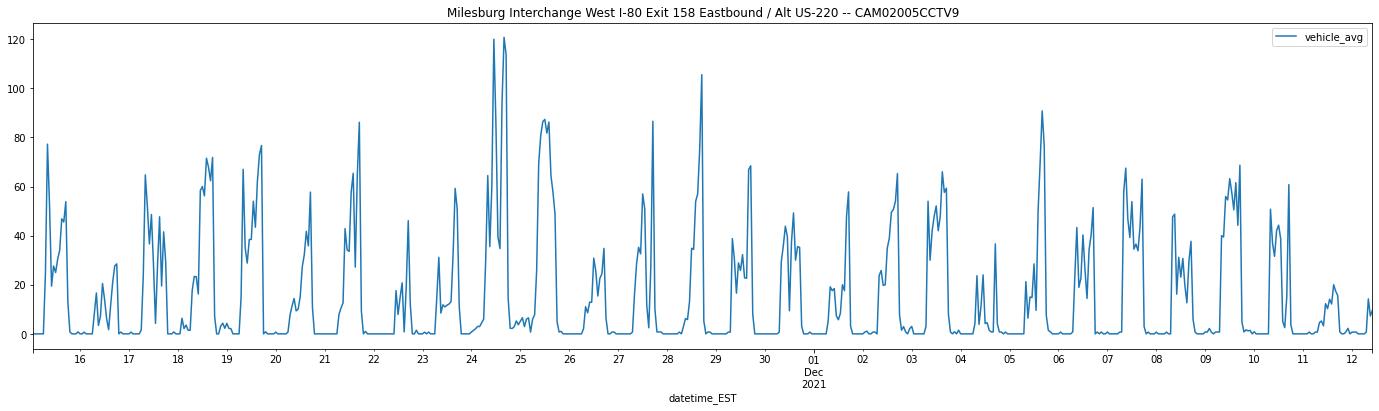

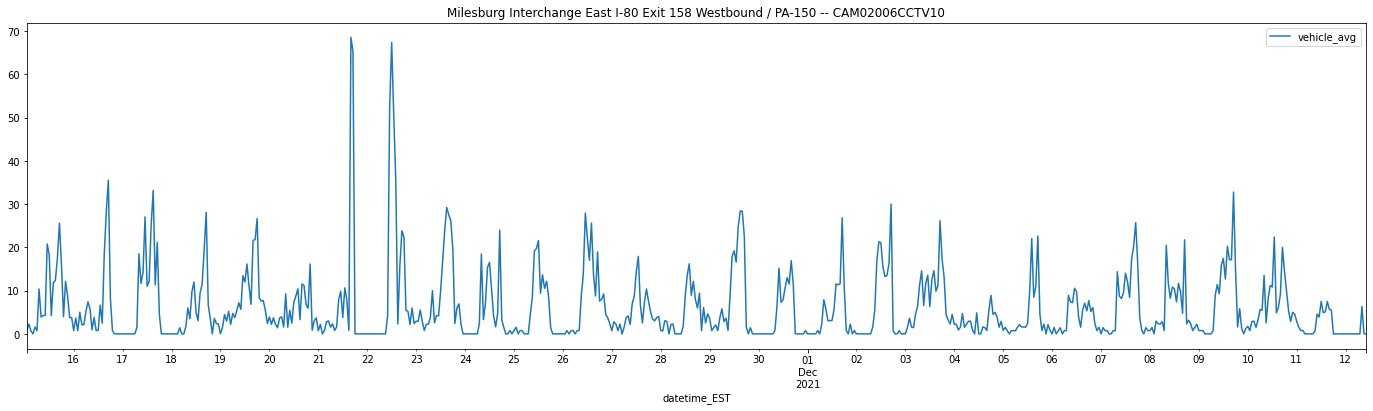

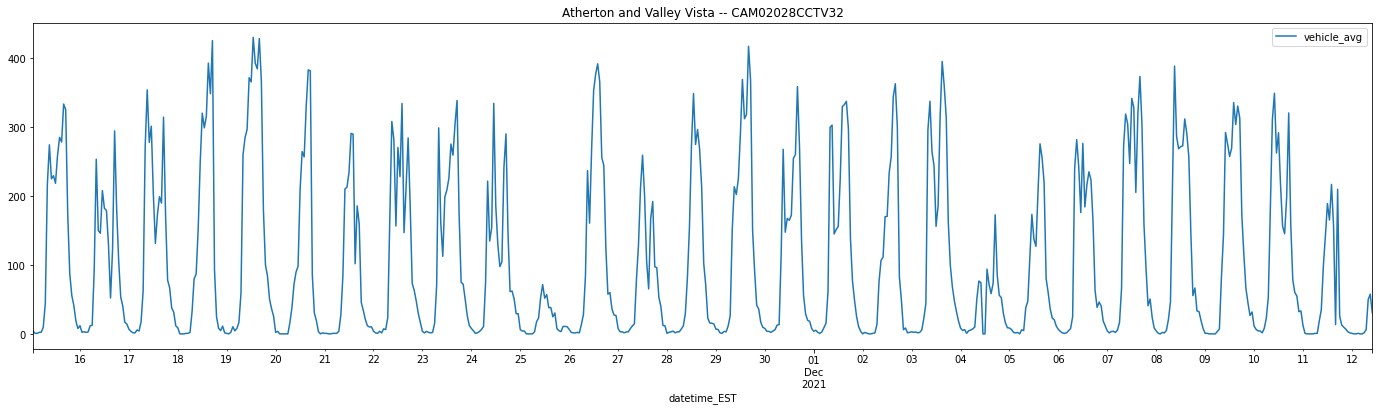

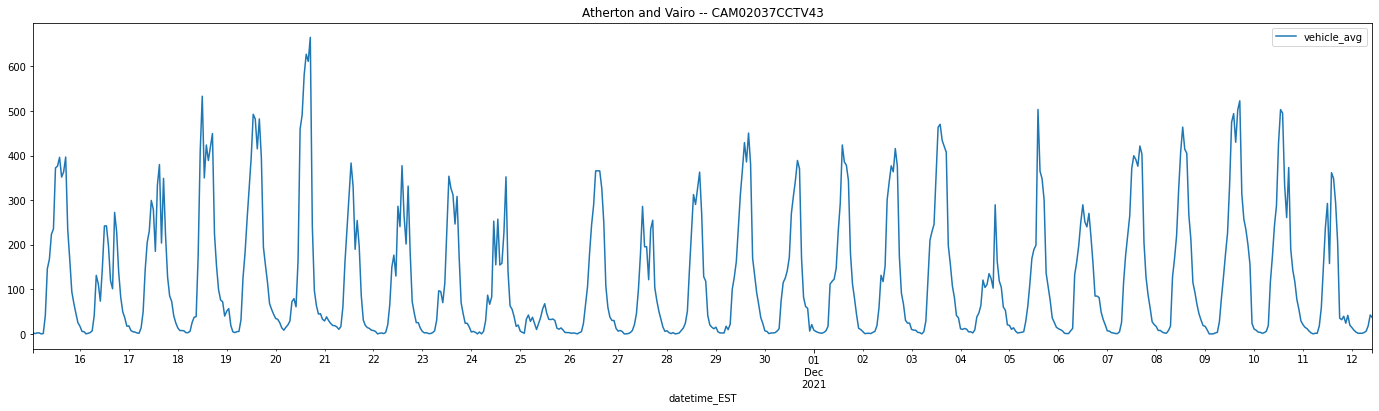

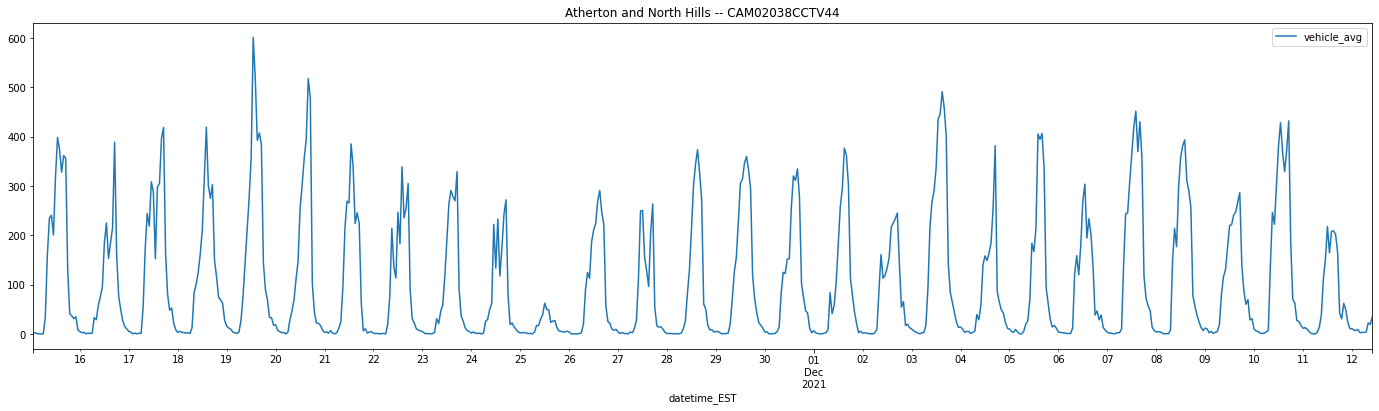

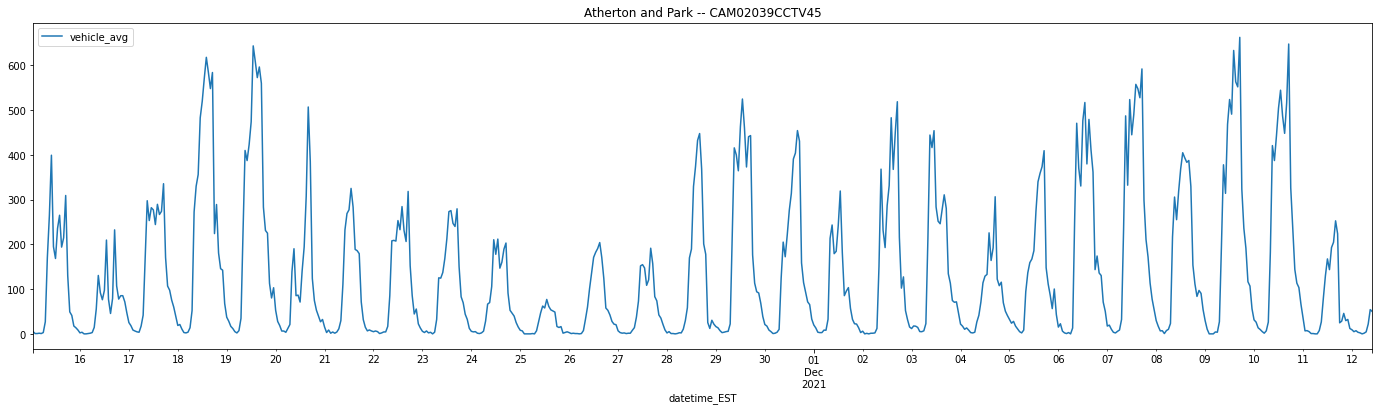

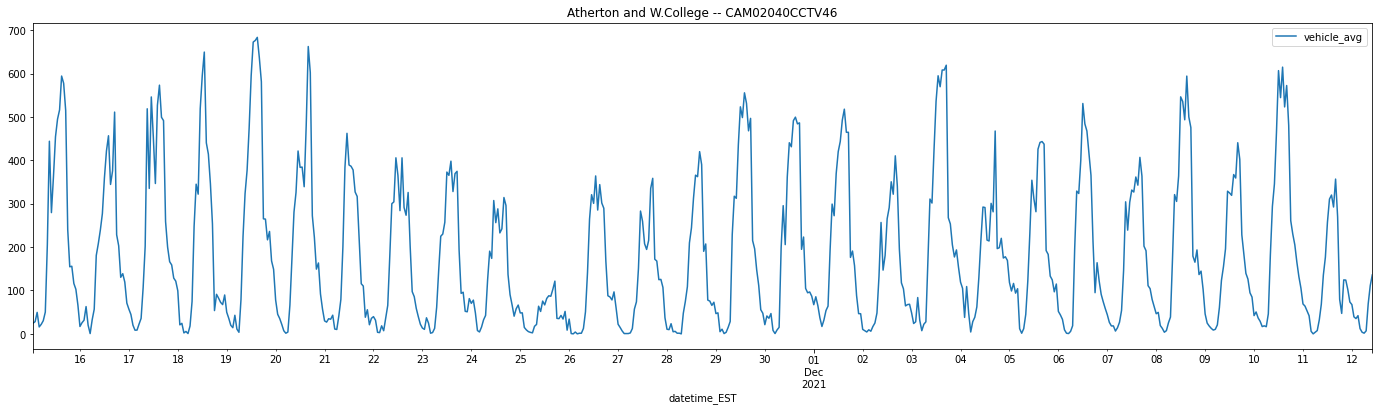

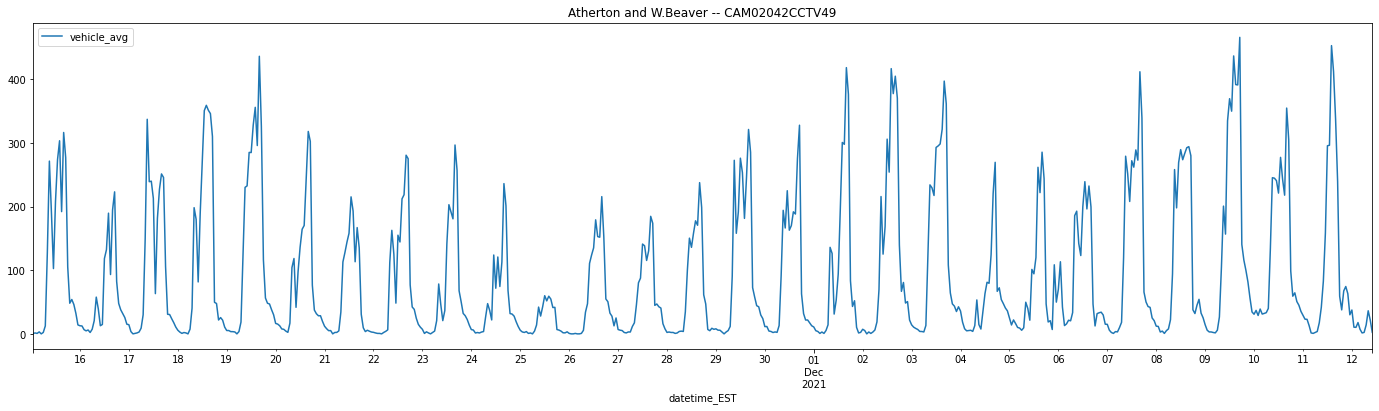

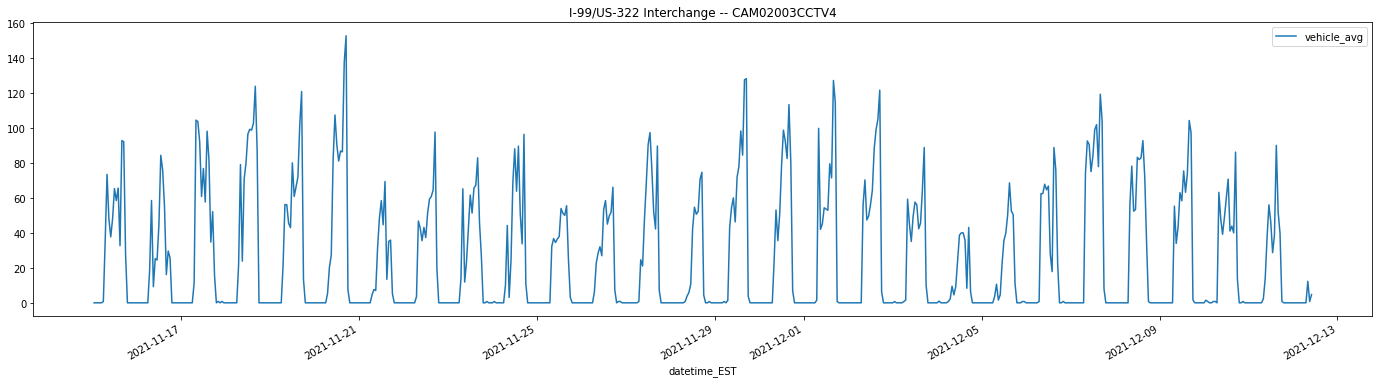

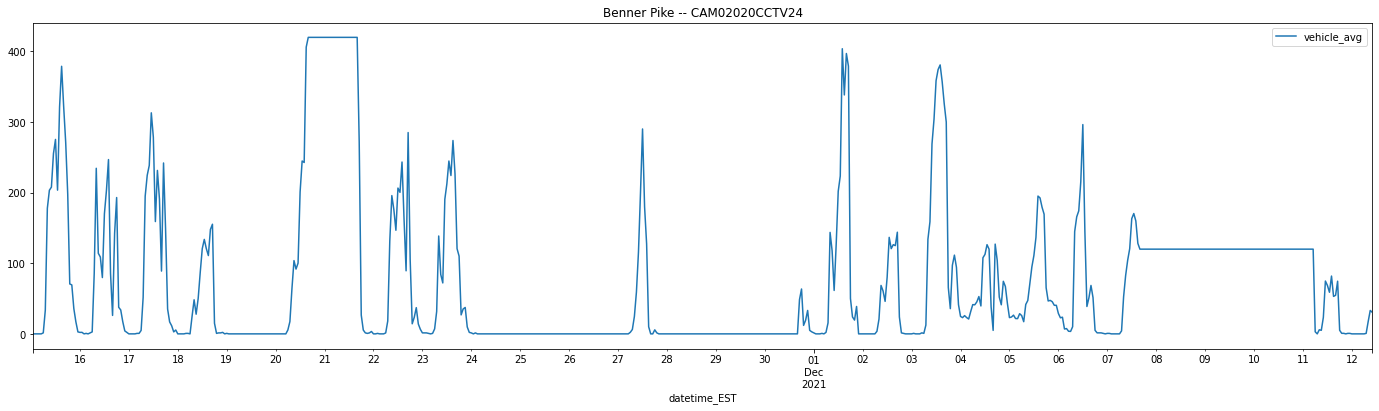

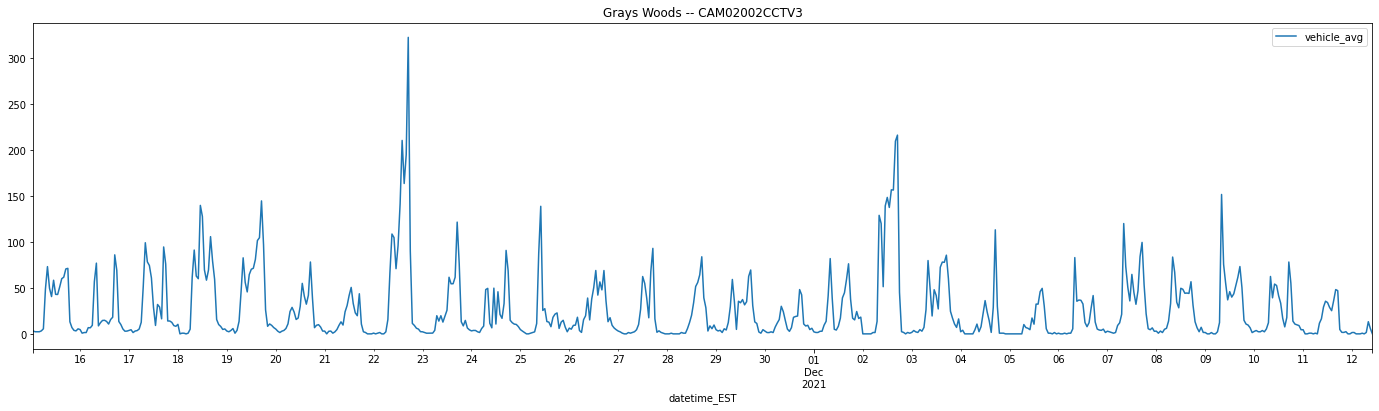

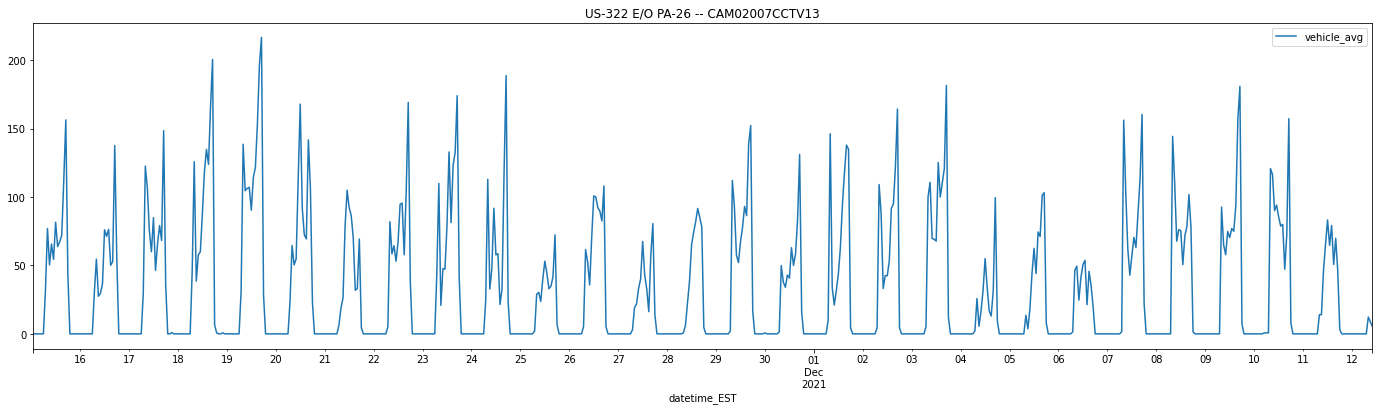

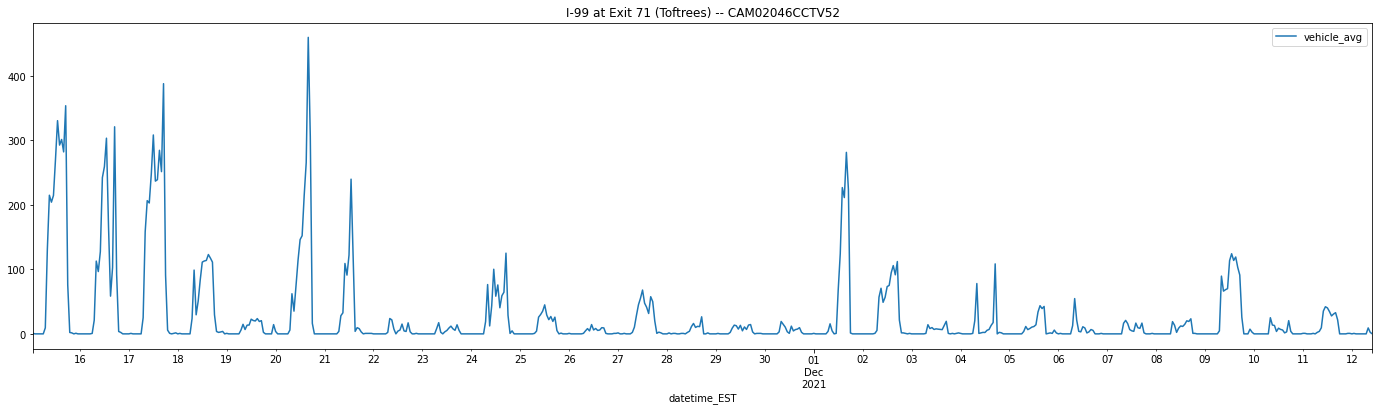

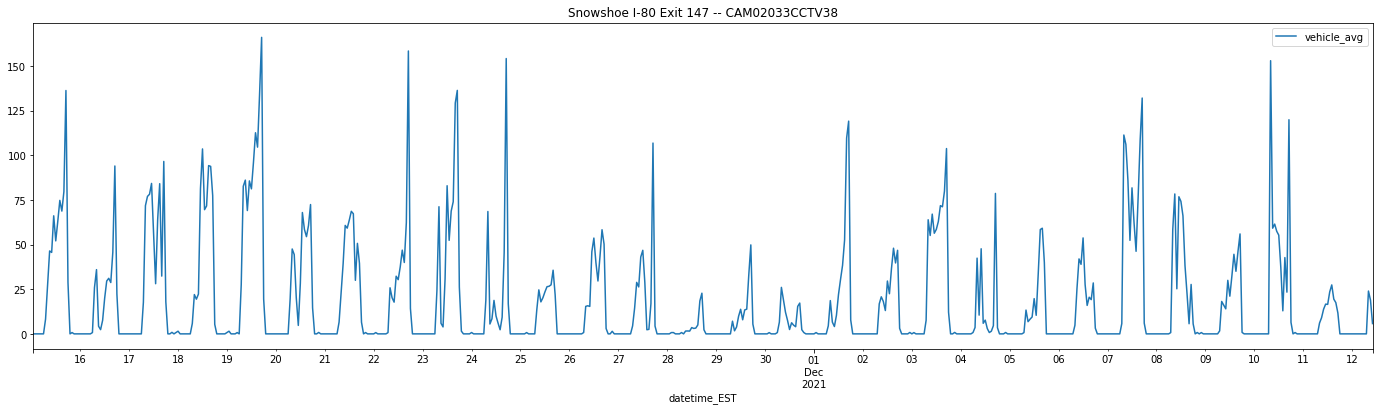

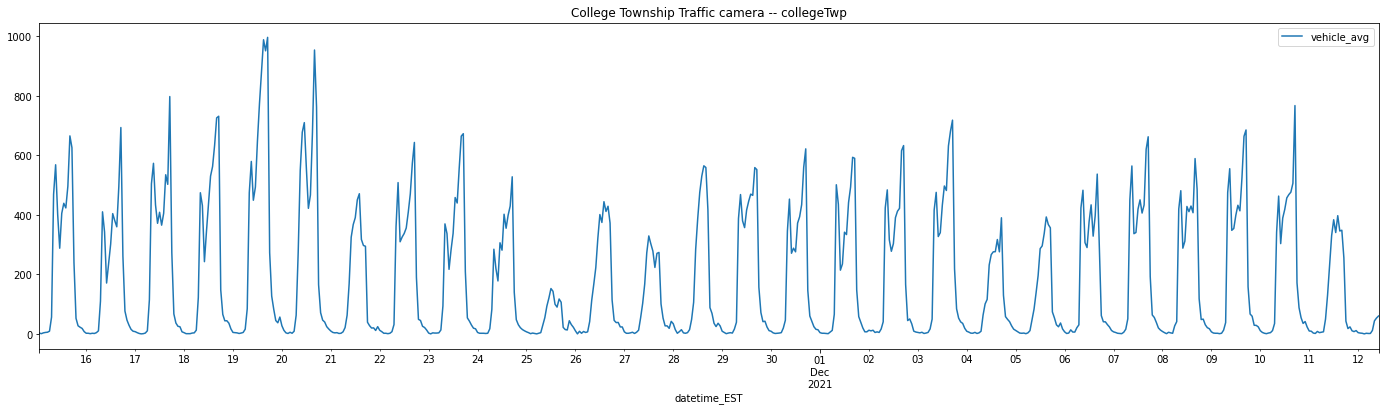

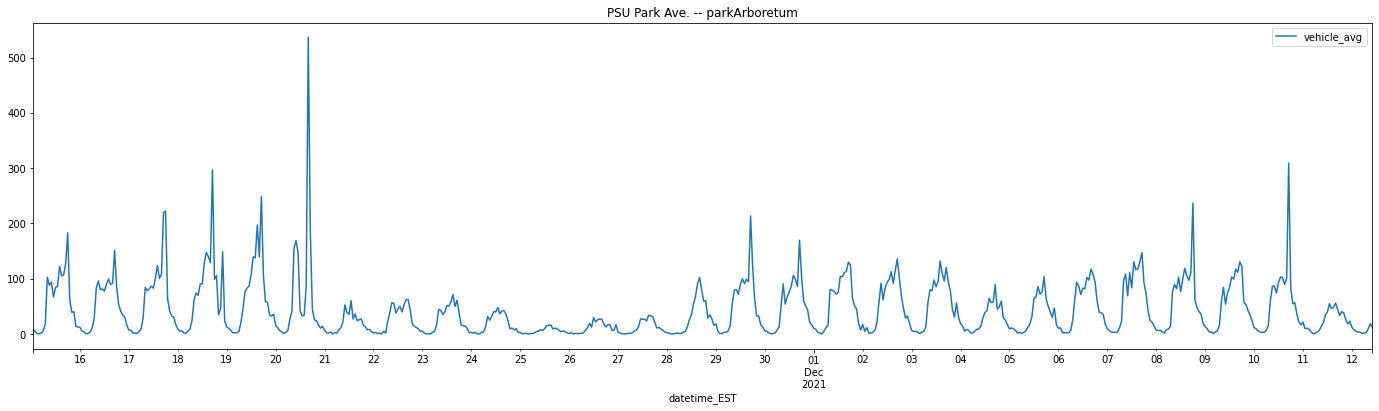

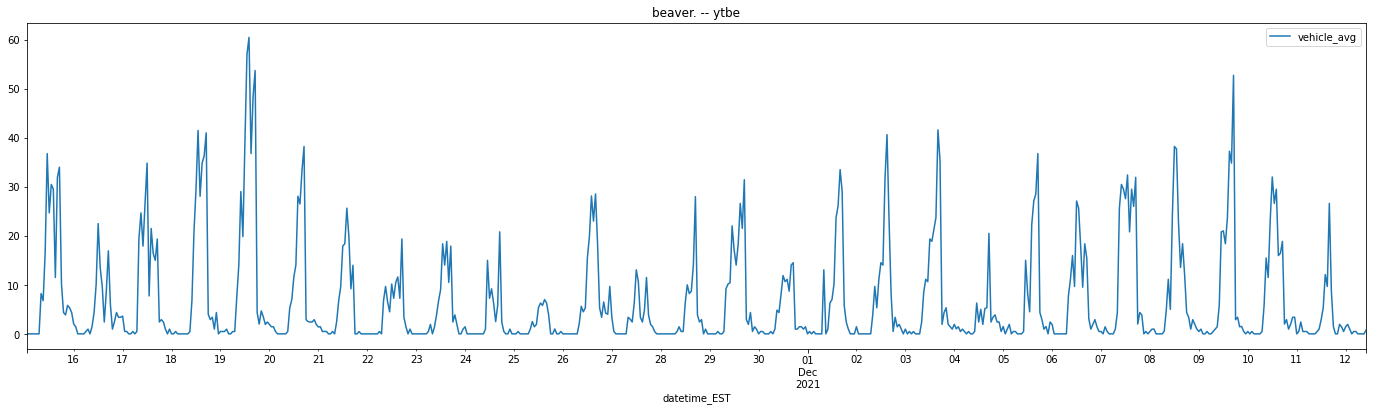

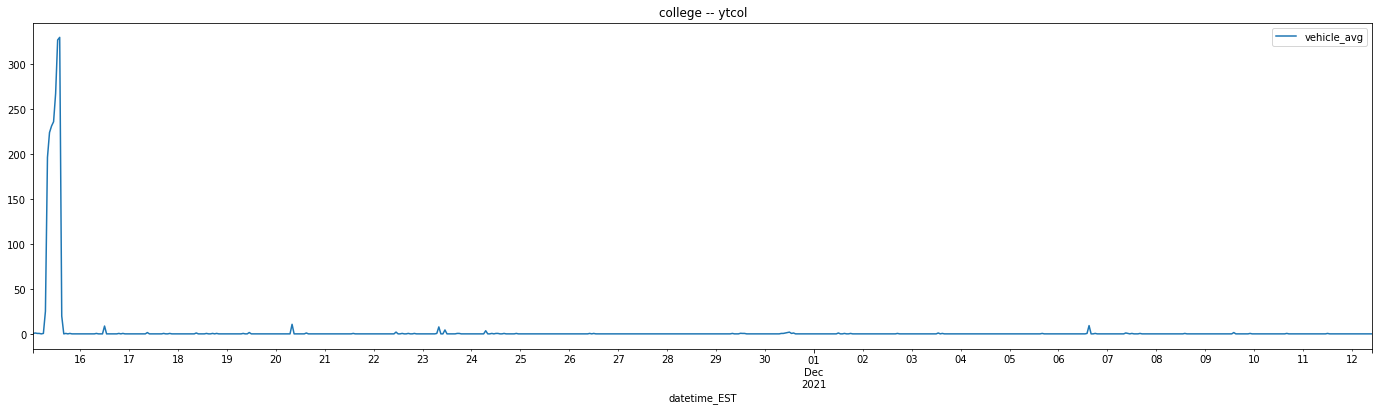

In [9]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    sds = fdf_twp[(fdf_twp['datetime_EST'] > '2021-11-15 00:00:00')]
    ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

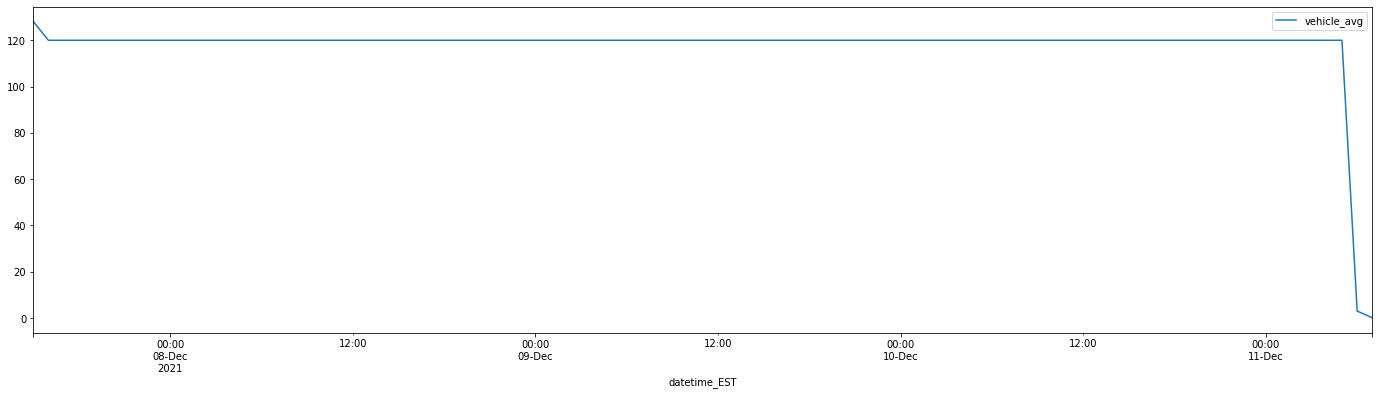

In [15]:
fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains("CAM02020CCTV24")].copy()
fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
fdf_twp.sort_values(by='datetime_EST')
sds = fdf_twp[(fdf_twp['datetime_EST'] > '2021-12-07 14:00:00') & (fdf_twp['datetime_EST'] < '2021-12-11 8:00:00') ]
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"")

In [7]:
# drop frozen images from Benner Pike
# jun 3 12:05:14 jun 5 21:01:59
xdfn = xdf.drop(xdf[(xdf["camera_name"] == "CAM02020CCTV24") & (xdf['datetime_EST'] > '2020-6-3 12:05:14') & (xdf['datetime_EST'] <= '2020-6-5 21:01:59') ].index)

# jun 3 12:05:14 jun 5 21:01:59
xdfn1 = xdfn.drop(xdfn[(xdfn["camera_name"] == "CAM02020CCTV24") & (xdfn['datetime_EST'] > '2020-6-22 12:05:00') & (xdfn['datetime_EST'] <= '2020-6-23 15:50:00') ].index)

print("X")

#xdfn2 = xdfn1#.drop(xdfn1[(xdfn1["camera_name"] == "CAM02020CCTV24") & (xdfn1['datetime_EST'] > '2020-6-28 14:06:00') ].index)

# drop frozen images from Bellefonte exchange:
#(fdft['datetime_EST'] > '2020-8-18 12:04:00') & (fdft['datetime_EST'] < '2020-8-19 16:03:00')
xdfn3 = xdfn1.drop(xdfn1[(xdfn1["camera_name"] == "CAM02009CCTV7") & (xdfn1['datetime_EST'] > '2020-8-18 12:04:00') & (xdfn1['datetime_EST'] < '2020-8-19 16:03:00') ].index)

del xdfn
del xdfn1

xdfn4 = xdfn3.drop(xdfn3[(xdfn3['datetime_EST'] > '2020-9-12 18:00:00') & (xdfn3['datetime_EST'] < '2020-9-13 13:00:00') ].index)

del xdfn3

print("X")


xdfn5 = xdfn4.drop(xdfn4[(xdfn4["camera_name"] == "CAM02020CCTV24") & (xdfn4['datetime_EST'] > '2020-10-10 12:00:00')].index)

del xdfn4
print("X")

xdfn6 = xdfn5.drop(xdfn5[(xdfn5["camera_name"] == "CAM02005CCTV9") & (xdfn5['datetime_EST'] > '2020-11-25 15:00:00') & (xdfn5['datetime_EST'] < '2020-11-27 00:00:00')].index)

xdfn7 = xdfn6.drop(xdfn6[(xdfn6["camera_name"] == "CAM02020CCTV24") & (xdfn6['datetime_EST'] > '2020-12-07 11:00:00') &  (xdfn6['datetime_EST'] < '2020-12-08 17:00:00')].index)

print("X")

xdfn7b = xdfn7.drop(xdfn7[(xdfn7["camera_name"] == "CAM02006CCTV10") & (xdfn7['datetime_EST'] > '2021-02-26 16:00:00') &  (xdfn7['datetime_EST'] < '2021-02-27 07:00:00')].index)
xdfn7c = xdfn7b.drop(xdfn7b[(xdfn7b["camera_name"] == "CAM02020CCTV24") & (xdfn7b['datetime_EST'] > '2021-03-25 09:00:00') &  (xdfn7b['datetime_EST'] < '2021-03-27 06:00:00')].index)

print("X")

xdfn7d = xdfn7c.drop(xdfn7c[(xdfn7c["camera_name"] == "CAM02020CCTV24") & (xdfn7c['datetime_EST'] > '2021-11-20 15:00:00') &  (xdfn7c['datetime_EST'] < '2021-11-21 17:00:00')].index)
xdfn7e = xdfn7d.drop(xdfn7d[(xdfn7d["camera_name"] == "CAM02020CCTV24") & (xdfn7d['datetime_EST'] > '2021-12-07 15:00:00') &  (xdfn7d['datetime_EST'] < '2021-12-11 7:00:00')].index)

X
X
X
X
X


In [8]:
print(len(xdfn7d))
print(len(xdfn7e))
#print(len(xdf8))

22400117
22400117


In [9]:
print(len(xdf))

23348770


In [ ]:
#xdfn8 = xdfn7.drop(xdfn7[(xdfn7["camera_name"] == "CAM02020CCTV24")

In [12]:
icdf = xdfn7e.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn7e.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdfn7e.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn7e.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [13]:
icdfcn = icdf.groupby(['datetime_EST'])['camera_name']
#icdfcn

In [ ]:
icdf

In [14]:
icdfs

datetime_EST  image_sum
0     2020-04-26 20:00:00        960
1     2020-04-26 21:00:00         68
2     2020-04-26 22:00:00        516
3     2020-04-26 23:00:00        794
4     2020-04-27 00:00:00        796
...                   ...        ...
14245 2021-12-12 06:00:00       1702
14246 2021-12-12 07:00:00       1726
14247 2021-12-12 08:00:00       1694
14248 2021-12-12 09:00:00       1683
14249 2021-12-12 10:00:00       1090

[14250 rows x 2 columns]

In [15]:
#xdf.set_index('datetime_EST', drop=False, inplace=True)
#df_sampledh = xdf.set_index('datetime_EST').resample('H').sum().reset_index()

xdfn7e.set_index('datetime_EST', drop=False, inplace=True)
df_sampledh = xdfn7e.set_index('datetime_EST').resample('H').sum().reset_index()

In [16]:
merged = df_sampledh.merge(icdfs, on='datetime_EST')

In [17]:
df_sampledh = merged

In [18]:
def get_vc_avg(row):
    rv = 0.0
    if row.image_sum > 0:
        rv = (float(row.vehicle_count) / (float(row.image_sum)/(22.0 * 60.0)))
    return rv   



In [19]:
df_sampledh['vehicle_avg'] = df_sampledh.apply(get_vc_avg, axis=1)

In [20]:
df_sampledh.to_csv(f"vehicle_avg_per_hour_all_cameras_427-{date}.csv",index=False)

In [21]:
#df_sampledh = pd.read_csv("vehicle_avg_per_hour_all_cameras_427-112921.csv")

In [22]:
def h2i (row):
    return int((row['datetime_EST']).strftime('%H'))

def date2day (row):
    return (row['datetime_EST']).dayofweek

In [23]:
#df_sampledh['Dates'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.date
#df_sampledh['Time'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.time
df_sampledh['ti'] = df_sampledh.apply (lambda row: h2i(row), axis=1)
df_sampledh['dy'] = df_sampledh.apply (lambda row: date2day(row), axis=1)


In [ ]:
df_sampledh

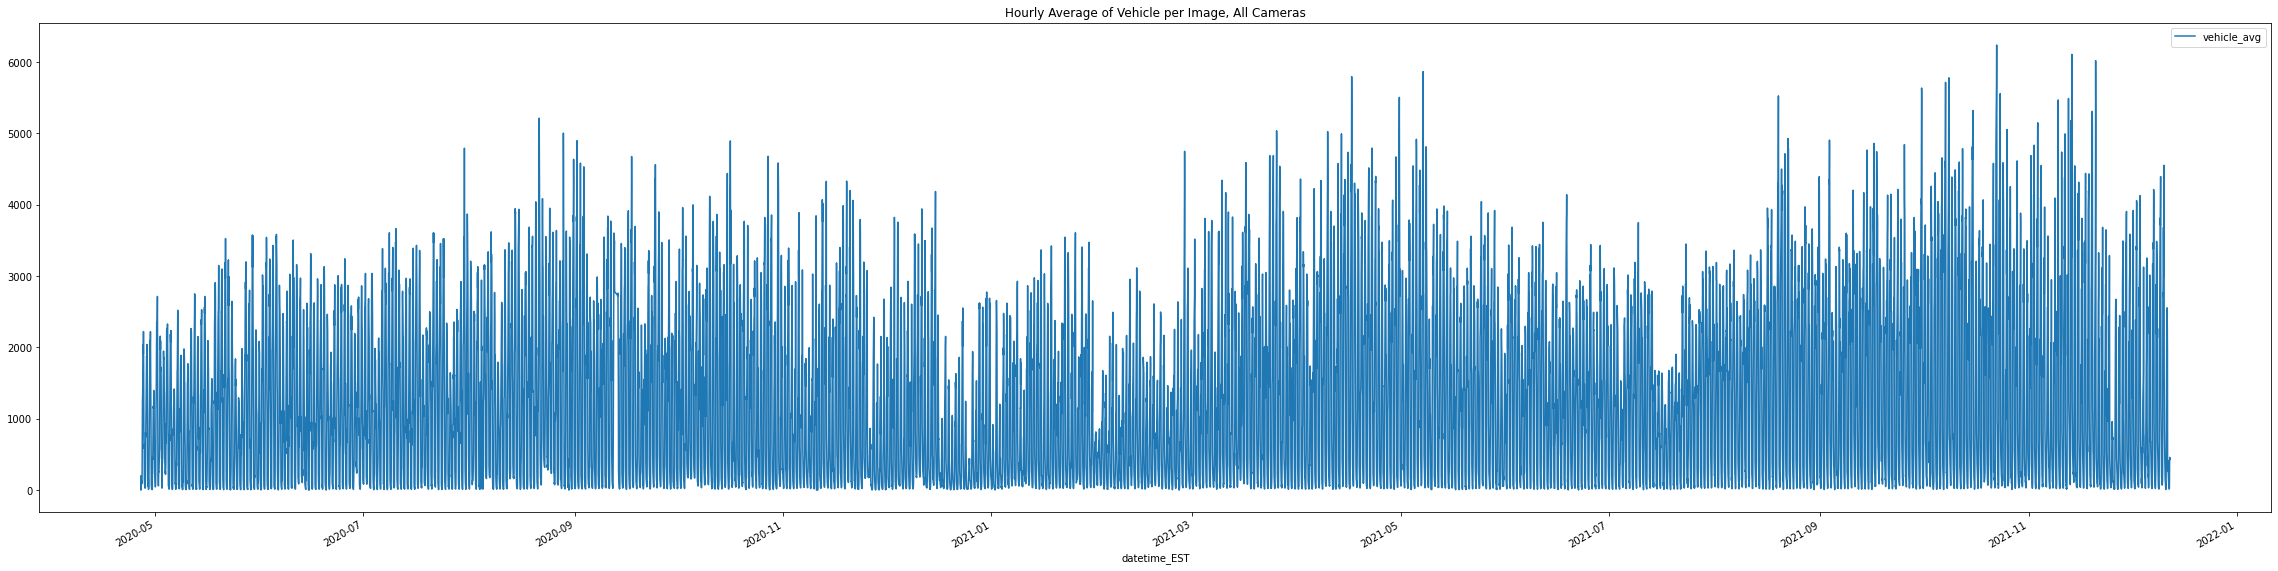

In [24]:
df_sampledh['datetime_EST'] = pd.to_datetime(df_sampledh['datetime_EST'])
df_sampledh.sort_values(by='datetime_EST')
df_sampledh.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicle per Image, All Cameras")

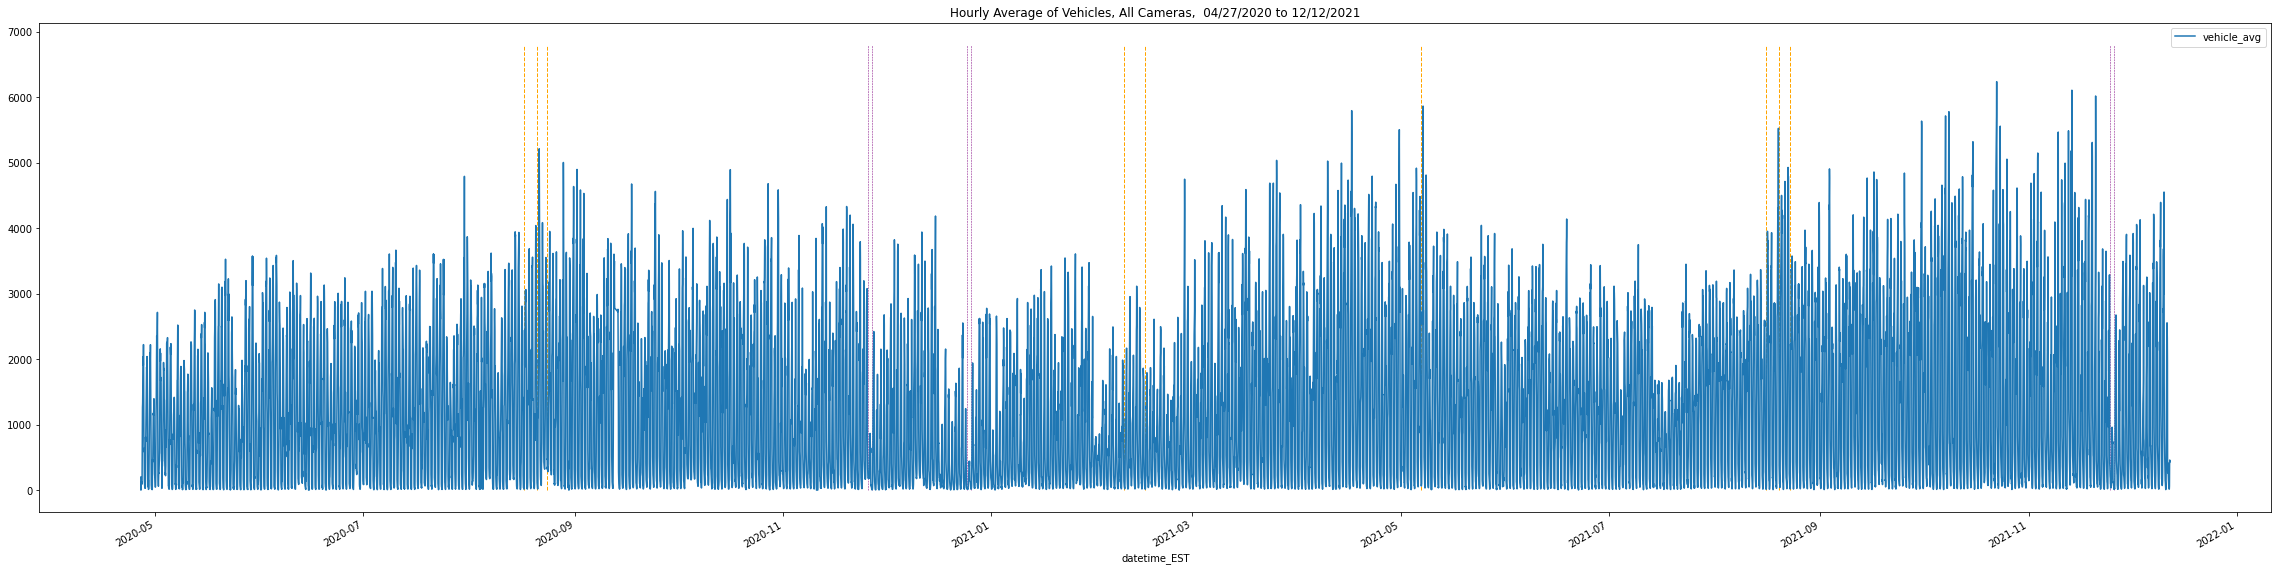

In [27]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2020-04-26 00:00:00') & (df_sampledh['datetime_EST'] < '2021-12-13 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicles, All Cameras,  04/27/2020 to 12/12/2021")
y_min = 0
y_max = 6800

plt.vlines(x=['2020-11-26 00:00:00','2020-11-27 00:00:00','2020-12-25 00:00:00','2020-12-26 00:00:00','2021-11-25 00:00:00','2021-11-26 00:00:00',], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=0.5, label='vline_multiple')
plt.vlines(x=['2020-08-17 00:00:00','2020-08-21 00:00:00','2020-08-24 00:00:00','2021-02-09 00:00:00','2021-02-15 00:00:00','2021-05-07 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')

plt.vlines(x=['2021-08-16 00:00:00','2021-08-20 00:00:00','2021-08-23 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')

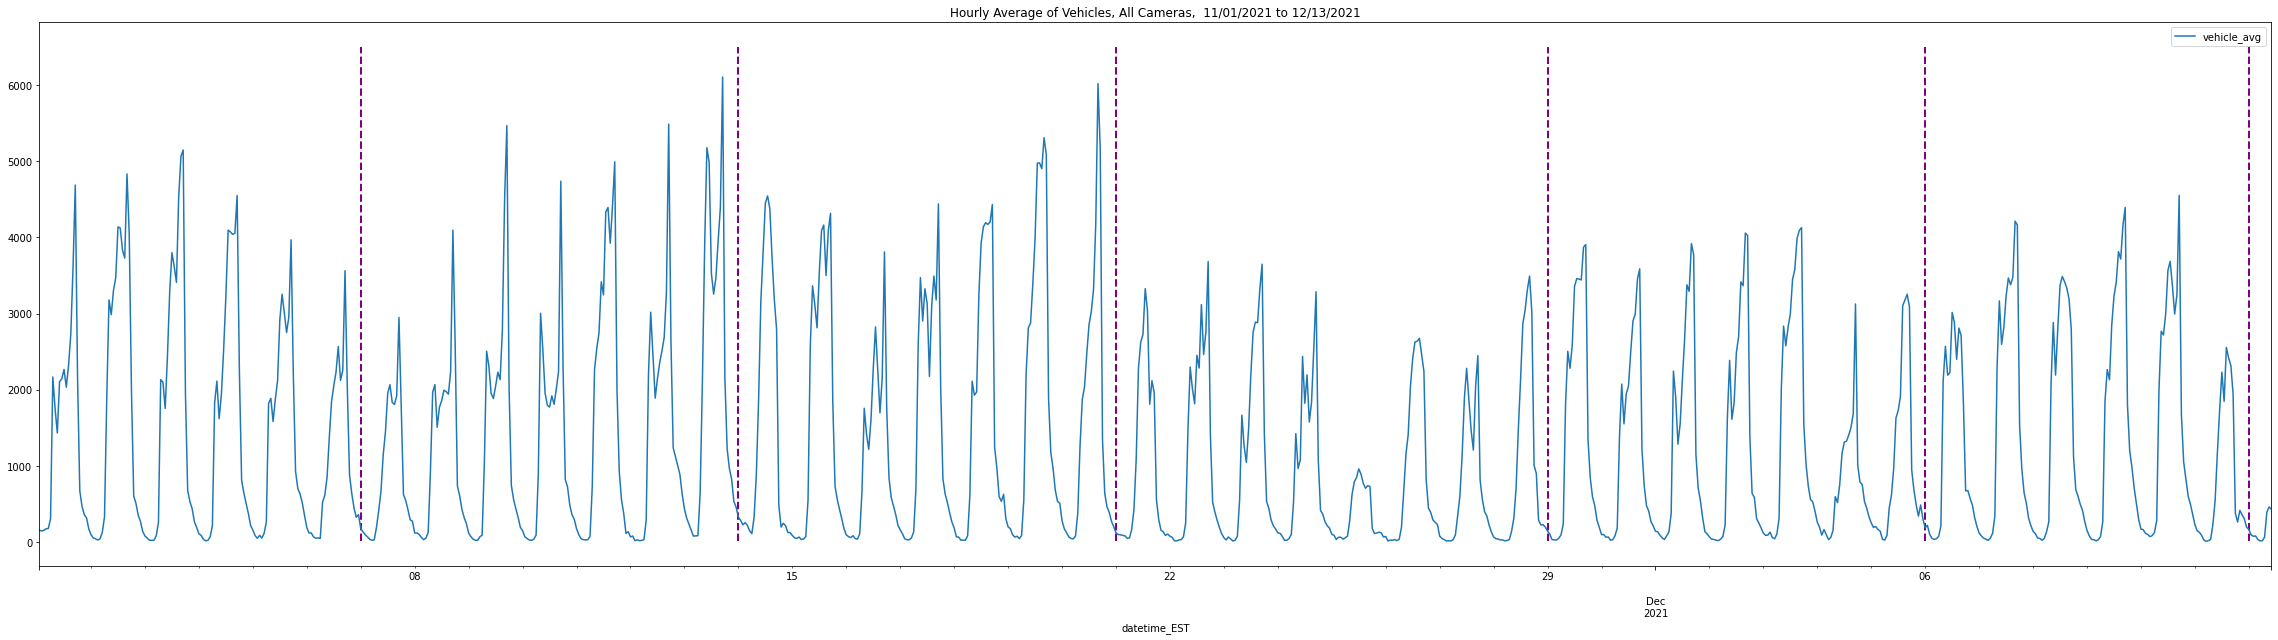

In [32]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2021-11-01 00:00:00') & (df_sampledh['datetime_EST'] < '2021-12-13 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicles, All Cameras,  11/01/2021 to 12/13/2021")
y_min = sds.vehicle_count.min()
y_max = 6500#sds.vehicle_count.max()

plt.vlines(x=['2021-11-07','2021-11-14','2021-11-21','2021-11-29','2021-12-06','2021-12-12'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=2, label='vline_multiple')

#plt.vlines(x=['2021-08-16 00:00:00','2021-08-20 00:00:00','2021-08-23 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')

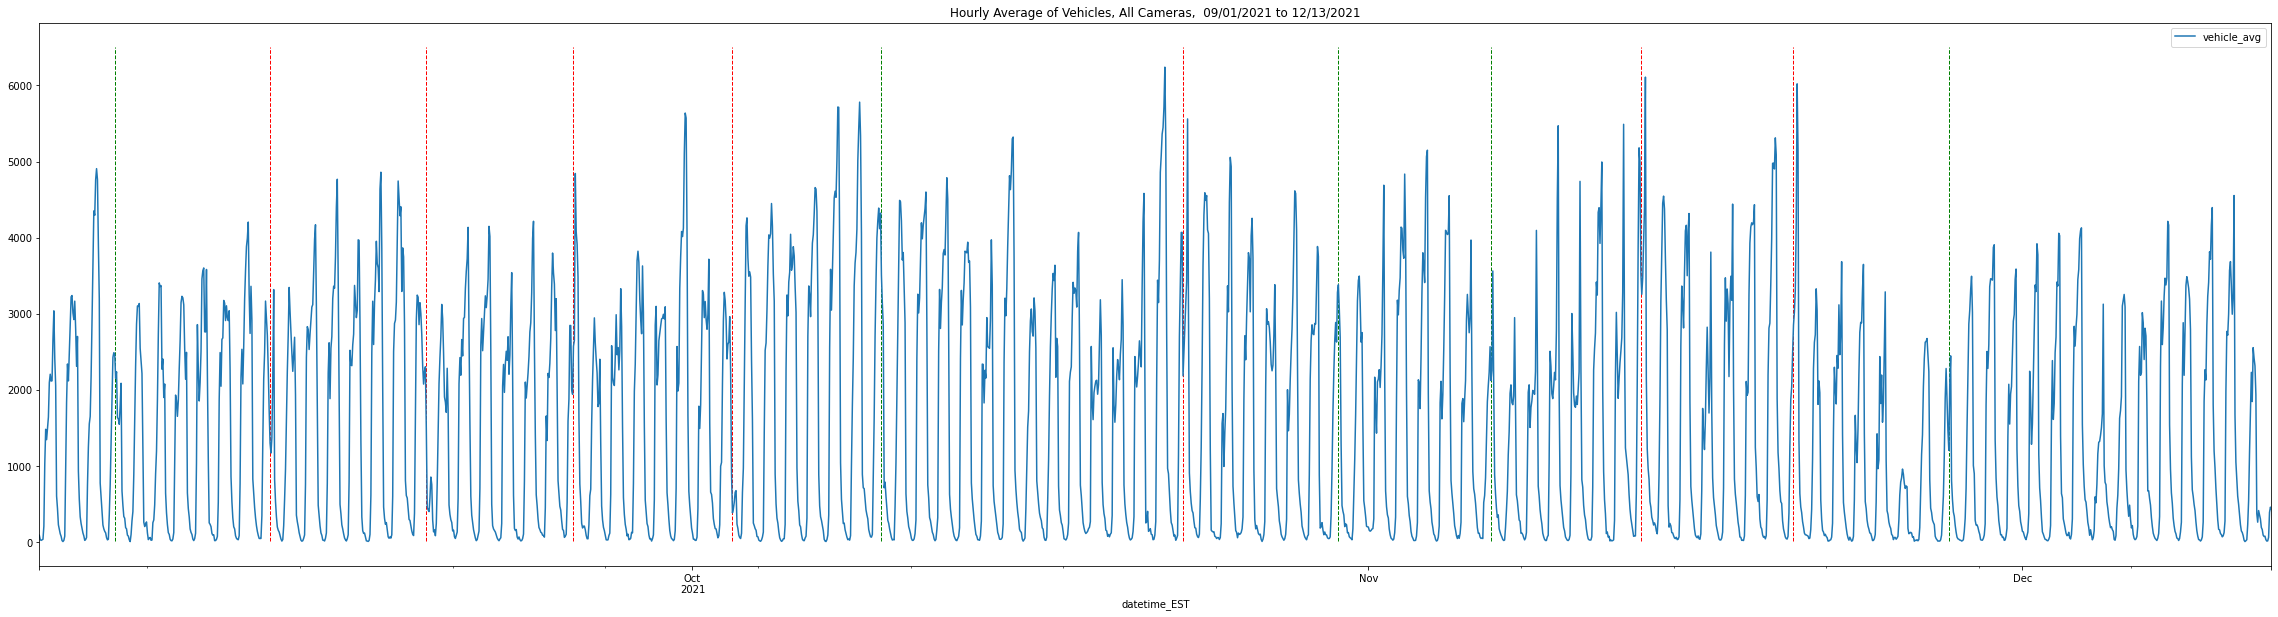

In [33]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2021-09-01 00:00:00') & (df_sampledh['datetime_EST'] < '2021-12-13 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicles, All Cameras,  09/01/2021 to 12/13/2021")
y_min = sds.vehicle_count.min()
y_max = 6500#sds.vehicle_count.max()

#plt.vlines(x=['2021-09-05','2021-09-12','2021-09-19','2021-09-26','2021-10-03','2021-10-10'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=2, label='vline_multiple')
#plt.vlines(x=['2021-05-07 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1.0, label='vline_multiple')
plt.vlines(x=['2021-08-16 00:00:00','2021-08-20 00:00:00','2021-08-23 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')
plt.vlines(x=['2021-09-04 12:00:00','2021-10-09 16:00:00','2021-10-30 15:30:00','2021-11-06 15:30:00','2021-11-27 15:30:00'], ymin=y_min, ymax=y_max, colors='green', ls='--', lw=1, label='vline_multiple')
plt.vlines(x=['2021-09-11 15:30:00','2021-09-18 19:30:00','2021-09-25 12:00:00','2021-10-02 19:30:00','2021-10-23 12:00:00','2021-11-13 12:00:00','2021-11-20 12:00:00'], ymin=y_min, ymax=y_max, colors='red', ls='--', lw=1, label='vline_multiple')

In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))